In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytpc
import seaborn as sns
import math
import matplotlib.pyplot as plt
import h5py
import heapq

In [8]:
def hough_circle(xyzs):
    nbins = 200
    xyz_order = xyzs[np.argsort(xyzs[:,2])]
    th = np.linspace(0,math.pi,nbins)
    #H = [0,0]
    Hrad = [0,0]
    xyz_order_f = xyz_order[5:]
    xyz_order = xyz_order[:-5]

   # return xyz_order, xyz_order_f
    for theta in th:
        Radius = (xyz_order_f[:,0]**2 - xyz_order[:,0]**2+ xyz_order_f[:,1]**2- xyz_order[:,1]**2)/(2*((xyz_order_f[:,0]- xyz_order[:,0])*np.cos(theta)+(xyz_order_f[:,1]- xyz_order[:,1])*np.sin(theta)))
        index = 0
        for rr in Radius:  
            aRad = np.hstack((theta,Radius[index]))
            Hrad = np.vstack((Hrad,aRad))
            index +=1

    Hrad = Hrad[1:]
    
    #countsRad, xedgesRad, yedgesRad, ImageRad = plt.hist2d(Hrad[:,0], Hrad[:,1], nbins,range=[[0,math.pi],[-500,500]],cmap=plt.cm.jet) 
    countsRad, xedgesRad, yedgesRad = np.histogram2d(Hrad[:,0], Hrad[:,1], nbins,range=[[0,math.pi],[-500,500]])

    iRad,jRad = np.unravel_index(countsRad.argmax(), countsRad.shape)

    tRad = iRad*math.pi/nbins
    rRad = jRad*1000/nbins - 500
   
    print(rRad,tRad)
  
    ax =  rRad*math.cos(tRad)  
    by =  rRad*math.sin(tRad)
  
    return ax,by

In [112]:
def hough_line(xy):
    nbins = 500
    th = np.linspace(0,math.pi,nbins)
    Hrad = [0,0]

    for theta in th:
        #if(theta)
        Radius = xy[:,0]*math.cos(theta) + xy[:,1]*math.sin(theta)
        index = 0
        for rr in Radius:
            #print(rr)
            #aRad = np.hstack((theta,rr))
            #print(aRad)
            aRad = np.hstack((theta,Radius[index]))
            #H = np.vstack((H,a))
            Hrad = np.vstack((Hrad,aRad))
            index +=1
    #H = H[1:]
    #print(Hrad)
    Hrad = Hrad[1:]
    
   # countsRad, xedgesRad, yedgesRad, ImageRad = plt.hist2d(Hrad[:,0], Hrad[:,1], nbins,range=[[0,math.pi],[-500,500]],cmap=plt.cm.jet) 
    countsRad, xedgesRad, yedgesRad = np.histogram2d(Hrad[:,0], Hrad[:,1], nbins,range=[[0,math.pi],[-500,500]]) 
    iRad,jRad = np.unravel_index(countsRad.argmax(), countsRad.shape)

    tRad = iRad*math.pi/nbins
    rRad = jRad*1000/nbins - 500

    return rRad, tRad, countsRad

In [5]:
h5_filename = '../run_0166_peaks_bkd_subtract.h5'
group_name = '/reduced_get_events'
file = h5py.File(h5_filename,'r')
group = file[group_name]

In [11]:
i = 0

In [108]:
#ev = '128'
print(i)
ev = str(i)
event = group[ev]
xyz = event[:,0:4]

#fig = plt.figure()
#ax = fig.add_subplot(111,projection='3d')
#cmhot = plt.get_cmap("jet")
#a = ax.scatter(xyz[:,0],xyz[:,1],xyz[:,2],c=xyz[:,3],cmap=cmhot)
#fig.colorbar(a)

23


In [109]:
a, b = hough_circle(xyz);

-105.0 2.26194671058


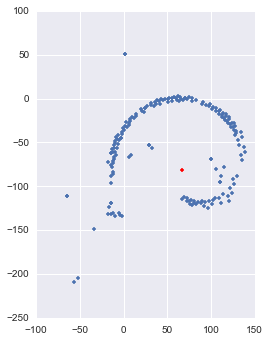

In [110]:
plt.plot(xyz[:,0],xyz[:,1],'.',a,b,'r.')
plt.axes().set_aspect(1)


In [113]:
rad_z = [0,0]
th_z= [0,0]
for xy in xyz:
    r_xy = np.sqrt((xy[0]-a)**2+(xy[1]-b)**2)
    rad_z = np.vstack((rad_z,[xy[2],r_xy]))
    th_xy = np.arctan((xy[1]-b)/(xy[0]-a))
    #print(th_xy)
    th_z = np.vstack((th_z,[xy[2],th_xy]))
    
rad_z = rad_z[1:]    
th_z = th_z[1:]  
r_th = th_z
r_th[:,1] = r_th[:,1]*rad_z[:,1]
r,t, counts = hough_line(r_th)


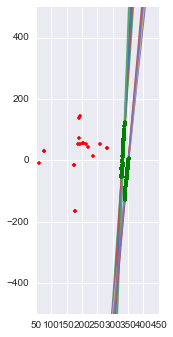

In [127]:
N = 10

ind = np.argpartition(counts.flatten(),-N)[-N:]
indices = np.vstack(np.unravel_index(ind,counts.shape)).T

r_signal = [0,0]
r_temp = r_th

nbins = 500
tRad = indices[:,0]*math.pi/nbins
rRad = indices[:,1]*1000/nbins - 500

x = np.linspace(50,450,100)
y = np.zeros(100)
plt.plot(r_th[:,0],r_th[:,1],'r.')
sig_i = []
for idx, rr in enumerate(rRad): 
    y_temp= (rRad[idx]-x*math.cos(tRad[idx]))/math.sin(tRad[idx])
    #print(len(y_temp))
    y = np.vstack((y,y_temp))
    plt.plot(x,y_temp,'-')
    #plt.plot(x,y_temp)
    b = math.sin(tRad[idx])
    c = -rr
    a = math.cos(tRad[idx])
    #for ii, xx in enumerate(x):
    y2 = (c/b)-a*x/b
    plt.plot(x,y2,'r')
    #print(a,b,c)
    idxx = []
    indd = 0;
    for rr in r_th:
        
        yy = (a*(-b*rr[0]+a*rr[1])-b*c)/(a**2+b**2)
        xx = (b*(b*rr[0]-a*rr[1])-a*c)/(a**2+b**2)
    
        if(math.sqrt((xx-rr[0])**2 +(yy-rr[1])**2) < 3):
            plt.plot(rr[0],rr[1],'g.')
            idxx.append(indd)
            if ((indd in sig_i) is False):
                sig_i.append(indd)
                r_signal = np.vstack((r_signal,rr))
        indd = indd+1
                
plt.ylim((-500,500))
#plt.xlim((100,250))
plt.axes().set_aspect(1)

In [ ]:
i = i+1